# 02 Simulasi Gerakan Tanah

Pada bagian ini kita akan melakukan simulasi gerakan tanah berupa *displacement, velocity,* dan *acceleration* memanfaatkan fungsi dan objek `Inventory` pada `obspy`.

## 0 Persiapan
Dalam setiap `notebook` kita perlu menginisiasi integrasi dengan Google Drive jika ingin mengakses data pada Google Drive, proses integrasi sama seperti yang sudah dilakukan sebelumnya:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Kemudian menginstall `obspy` dengan perintah:

In [ ]:
!pip install obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.3 MB 5.0 MB/s 


Tekan `RESTART RUNTIME` agar `obspy` dan `cartopy` dapat terbaca di *runtime*

## 1 Membaca Data Seismik

`obspy` dapat membaca berbagai jenis format data ataupun metadata, untuk membaca data kita dapat menggunakan fungsi `read`:

In [ ]:
from obspy import read

st=read('/content/drive/MyDrive/BMKG_Akselerometer/event-sundastrait-20210321/ASJR_Z.mseed')
st+=read('/content/drive/MyDrive/BMKG_Akselerometer/event-sundastrait-20210321/ASJR_N.mseed')
st+=read('/content/drive/MyDrive/BMKG_Akselerometer/event-sundastrait-20210321/ASJR_E.mseed')
print(st)

3 Trace(s) in Stream:
IA.ASJR.00.HNZ | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNN | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples


## 2 Manajemen Metadata Stasiun

Selain membaca data seismik dalam berbagai format, `obspy` juga memiliki fitur untuk membaca dan manajemen metadata stasiun dalam berbagai format. Dalam kasus ini kita akan membaca StationXML sebagai informasi metadata instrumen dan stasiun dan memanfaatkan `obspy` untuk mengeksplorasi metadata tersebut. Struktur objek `Inventory` dalam `obspy`:
![inventory obspy](https://docs.obspy.org/_images/Inventory.png)

### 2.1 Membaca StationXML

StationXML dapat dibaca menggunakan fungsi `read_inventory` karena dalam `obspy` metadata stasiun diwakili dalam object `Inventory`, fungsi ini dapat membaca berbagai format (CSS, KML, SACPZ, SHAPEFILE, STATIONTXT, STATIONXML):

In [ ]:
from obspy import read_inventory
meta = read_inventory("/content/drive/MyDrive/BMKG_Akselerometer/event-sundastrait-20210321/Dataless/ASJR_manopduatiga_PGN_Seismotek_Inventory_IA.xml")
print(meta)

Inventory created at 2022-07-15T14:11:15.537234Z
	Sending institution: scxml import (ObsPy Inventory)
	Contains:
		Networks (1):
			IA
		Stations (1):
			IA.ASJR (REIS Anyer)
		Channels (3):
			IA.ASJR.00.HNZ, IA.ASJR.00.HNN, IA.ASJR.00.HNE


/usr/local/lib/python3.7/dist-packages/obspy/io/seiscomp/inventory.py:427: UserWarning: Sensor is missing elevation information, using 0.0
  warnings.warn(msg)


Karena file StationXML di atas hanya mewakili 1 stasiun saja maka pada `Stations` hanya tertulis 1 stasiun saja yaitu REIS Anyer (ASJR). Dalam informasi di atas juga memuat informasi lain seperti waktu pembuatan, jaringan, dan *channel*.

### 2.2 Mengakses informasi dalam `Inventory`

Informasi dalam `Inventory` atau metadata dapat diakses menggunakan indeks seperti yang dilakukan pada data `Stream`. Sebagai contoh jika akan mengakses jaringan pertama maka dapat menggunakan indeks 0:

In [ ]:
meta[0]

Network IA (BMG-Net, Indonesia (IA-Net))
	Station Count: None/None (Selected/Total)
	1980-01-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (1):
			IA.ASJR (REIS Anyer)
		Channels (3):
			IA.ASJR.00.HNZ, IA.ASJR.00.HNN, IA.ASJR.00.HNE

Demikian pula jika ingin mengakses informasi stasiun pertama pada jaringan pertama maka indeks dapat bertingkat:

In [ ]:
meta[0][0]

Station ASJR (REIS Anyer)
	Station Code: ASJR
	Channel Count: None/None (Selected/Total)
	2018-01-02T00:00:00.000000Z - 
	Access: closed 
	Latitude: -6.06, Longitude: 105.92, Elevation: 0.0 m
	Available Channels:
		ASJR.00.HNZ, ASJR.00.HNN, ASJR.00.HNE

Termasuk mengakses informasi sampai level channel, sebagai contoh disini akan mengambil informasi dari channel ke 2:

In [ ]:
meta[0][0][1]

Channel 'HNN', Location '00' 
	Time range: 2018-01-02T00:00:00.000000Z - --
	Latitude: -6.06, Longitude: 105.92, Elevation: 0.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Sampling Rate: 100.00 Hz
	Sensor (Description): SM (GFZ:IA1980:G210S/g=0)
	Response information available

Setelah sampai pada tahap ini kita juga masih bisa mengakses sampai informasi yang mendetail, misalkan mengambil nama sensor:

In [ ]:
meta[0][0][1].sensor

Equipment:
	Type: SM
	Description: GFZ:IA1980:G210S/g=0
	Manufacturer: Meisei
	Vendor: None
	Model: G210S
	Serial number: None
	Installation date: None
	Removal date: None
	Resource id: Sensor/20181102134034.587314.41
	Calibration Dates:


### 2.3 Mengakses Informasi Respon Instrumen

Seperti pada 2.2 kita bisa mengambil informasi respon instrumen dengan `key` `response` seperti contoh di bawah:

In [ ]:
response=meta[0][0][1].response

Termasuk untuk mengeplot respon instrumen:

No handles with labels found to put in legend.


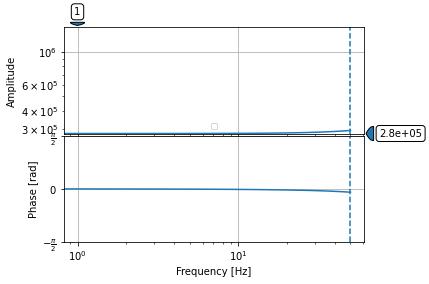

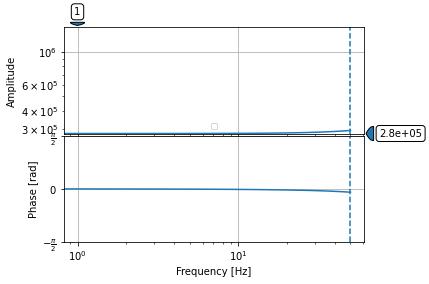

In [ ]:
response.plot(min_freq=1, output="ACC")

### 2.4 Menyimpan Metadata dalam File

Selain membaca metadata, `obspy` juga memfasilitasi penyimpanan metadata dalam bentuk file dengan `Inventory.write` dalam berbagai format (CSS, KML, SACPZ, SHAPEFILE, STATIONTXT, STATIONXML), misalkan kita akan menyimpan dalam format SAC Pole and Zero:

In [ ]:
meta.write('/content/drive/MyDrive/BMKG_Akselerometer/metadata_baru.pz', format='SACPZ')

Akan muncul file dengan nama `metadata_baru.pz` dalam file explorer yang bisa dibuka.

## 3 Melakukan Koreksi Instrumen

Dengan menggunakan metadata stasiun maka kita dapat melakukan koreksi instrumen (dekonvolusi respon instrumen) pada data seismik untuk mendapatkan gerakan tanah sesungguhnya (*true ground motion*). Proses koreksi instrumen dapat dilakukan dengan bantuan `remove_response` dari `Stream`.

### 3.1 Mendapatkan akselerasi tanah

Akselerasi dapat dipilih dengan memilih `ACC` pada opsi `output`:

3 Trace(s) in Stream:
IA.ASJR.00.HNZ | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNN | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples

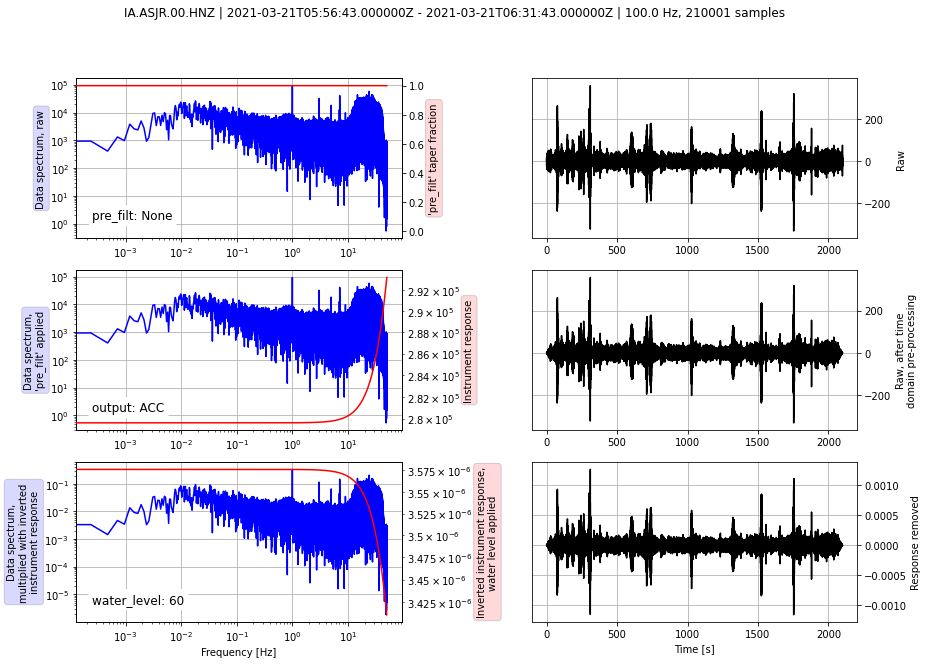

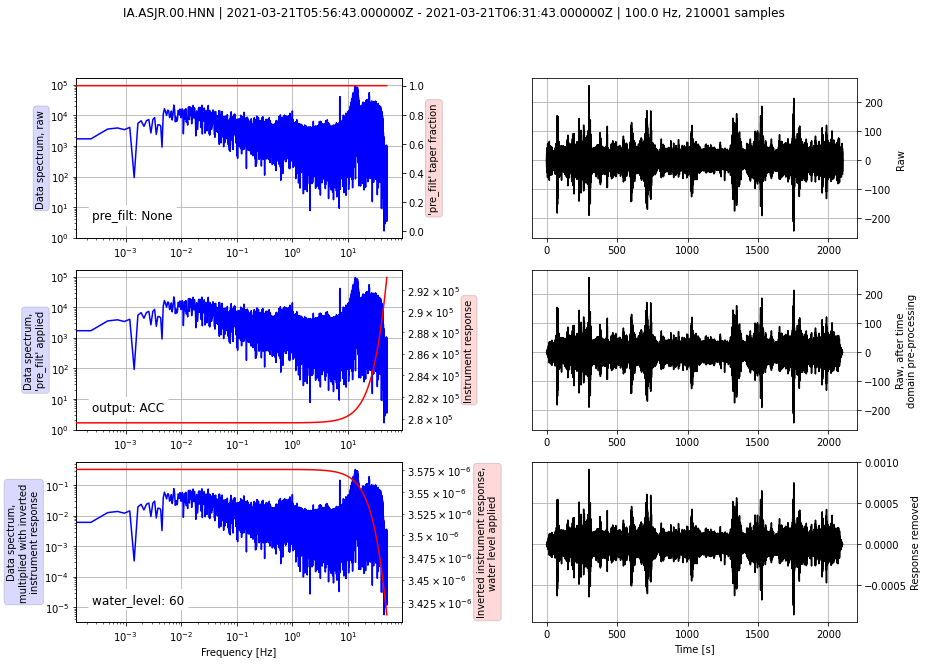

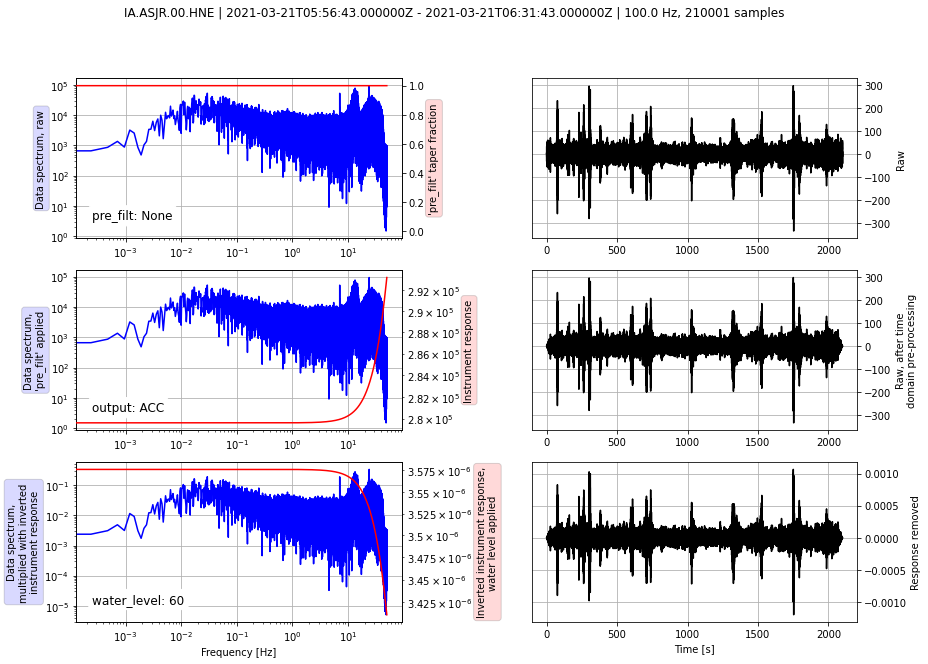

In [ ]:
st_acc = st.copy()
st_acc.remove_response(inventory=meta, output='ACC', plot=True)

Dari hasil di atas terdapat 6 plot, 3 plot dalam domain frekuensi dan 3 plot di kolom sebelahnya dalam domain waktu yang masing-masing mewakili: data mentah (*raw*), data prapemrosesan (dalam proses diatas tidak dilakukan/`None`), dan data hasil koreksi (`response removed`). Pada proses di atas bentuk spektrum bisa terlihat sedikit perbedaan dalam nilai amplitudo ataupun bentuk spektrum (biru) misal di rentang frekuensi rendah. Dari segi bentuk gelombang tidak terlalu terlihat perbedaan tetapi dari nilai amplitudo sudah jauh berbeda.

### 3.2 Mendapatkan kecepatan tanah

Sama seperti proses pada akselerasi, kita hanya perlu mengganti parameter `output` menjadi `VEL`:

3 Trace(s) in Stream:
IA.ASJR.00.HNZ | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNN | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples

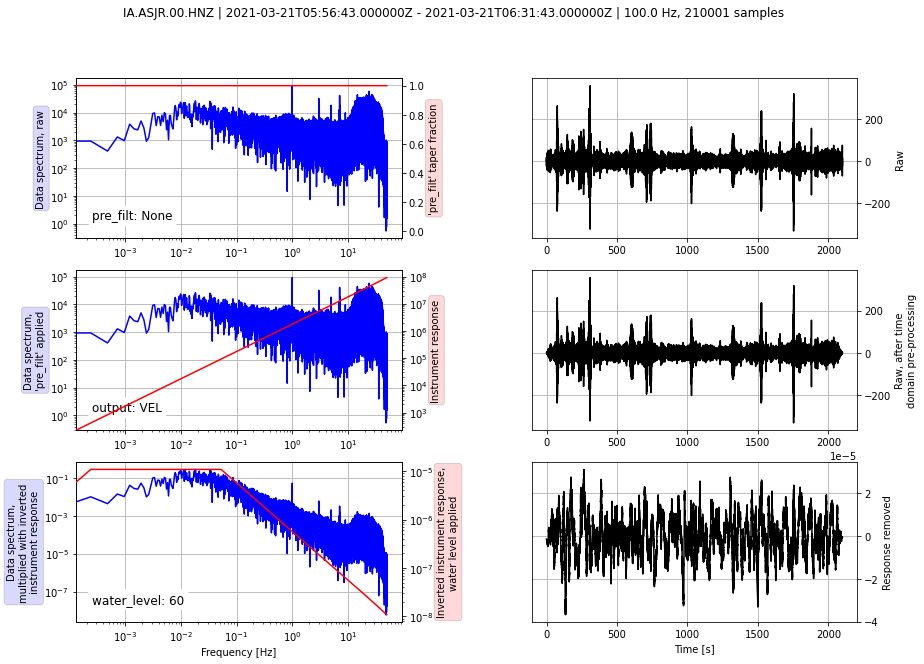

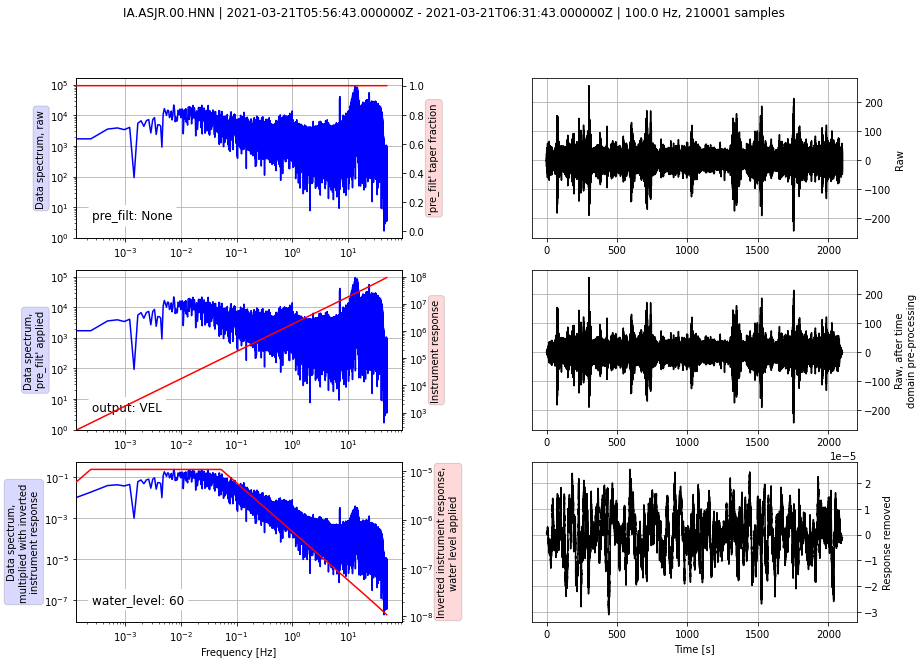

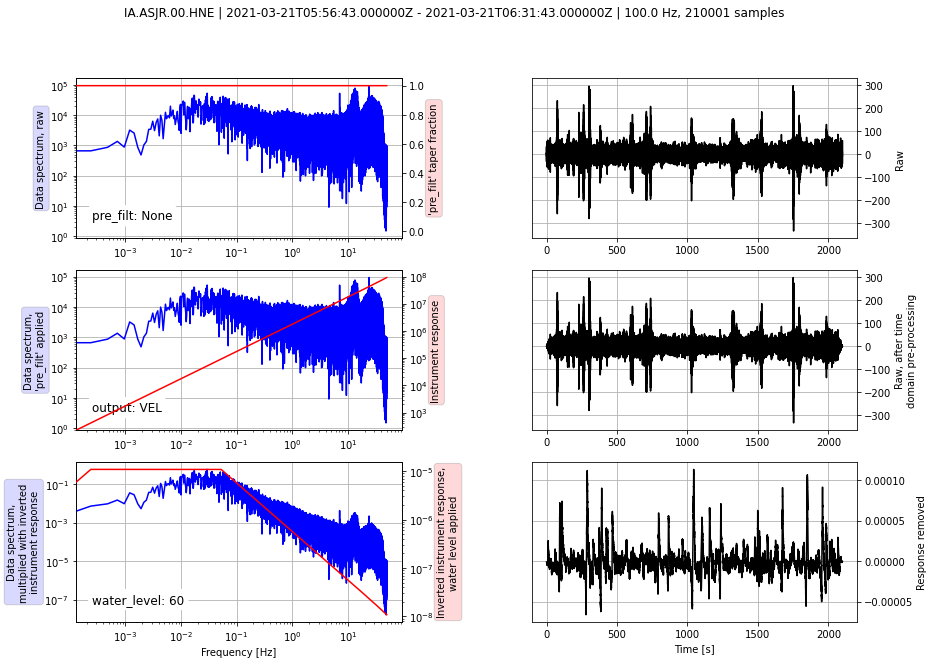

In [ ]:
st_vel = st.copy()
st_vel.remove_response(inventory=meta, output='VEL', plot=True)

### 3.2 Mendapatkan simpangan (*displacement*) tanah

3 Trace(s) in Stream:
IA.ASJR.00.HNZ | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNN | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.ASJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples

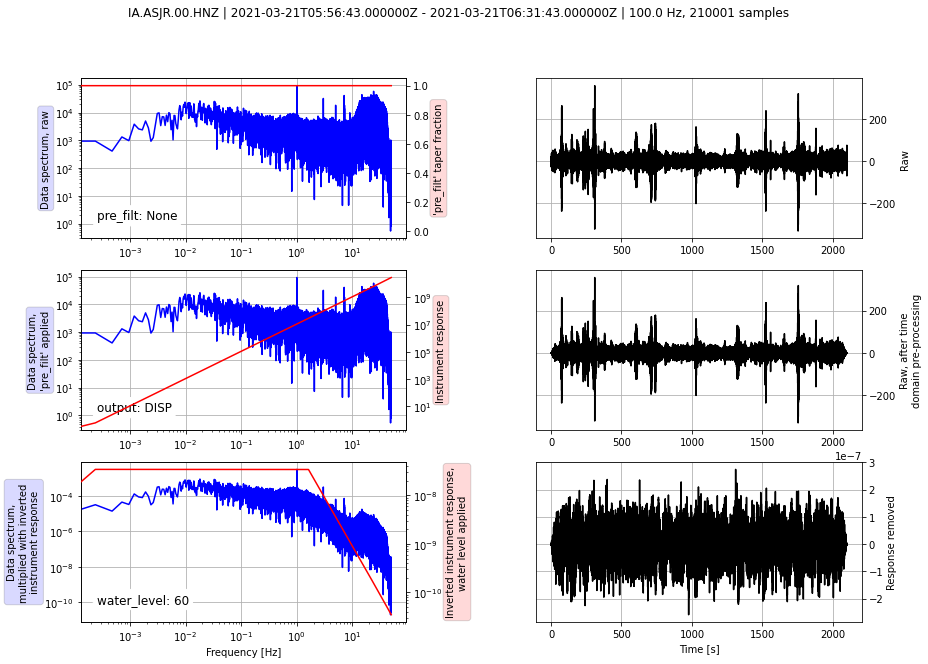

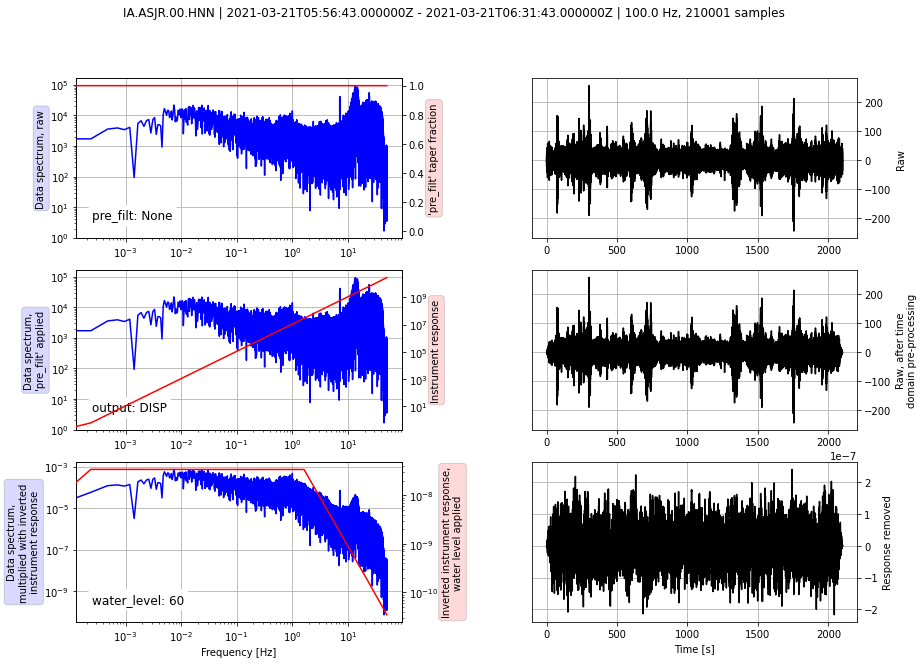

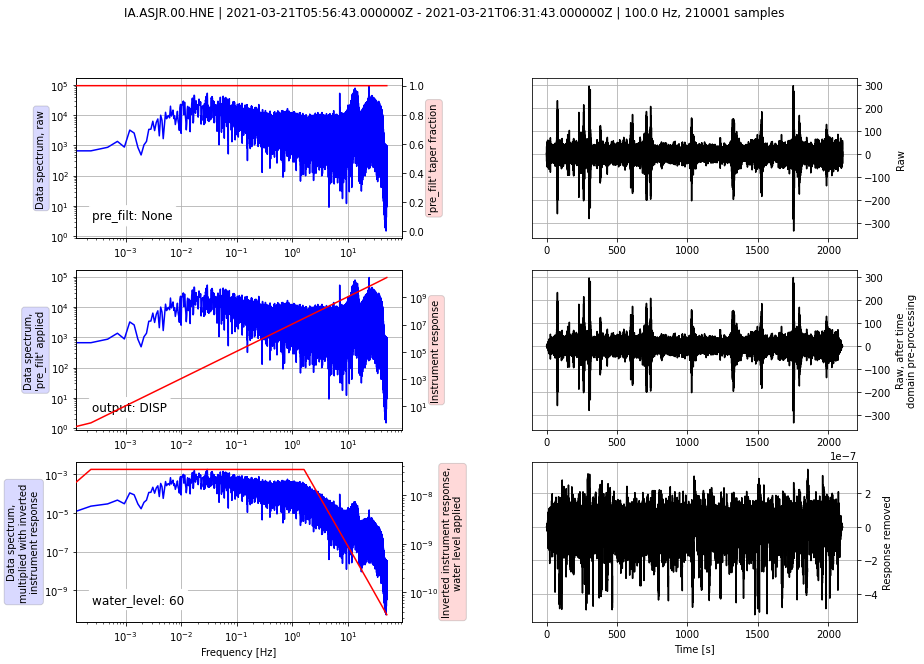

In [ ]:
st_disp = st.copy()
st_disp.remove_response(inventory=meta, output='DISP', plot=True)

### 3.4 Koreksi instrumen lebih lanjut

Tiga proses koreksi instrumen di atas menggunakan parameter yang sudah *default*, kita dapat melihat parameter apa saja yang dapat dimasukkan dalam proses koreksi instrumen dengan:

In [ ]:
help(st[0].remove_response)

Help on method remove_response in module obspy.core.trace:

remove_response(inventory=None, output='VEL', water_level=60, pre_filt=None, zero_mean=True, taper=True, taper_fraction=0.05, plot=False, fig=None, **kwargs) method of obspy.core.trace.Trace instance
    Deconvolve instrument response.
    
    Uses the adequate :class:`obspy.core.inventory.response.Response`
    from the provided
    :class:`obspy.core.inventory.inventory.Inventory` data. Raises an
    exception if the response is not present.
    
    Note that there are two ways to prevent overamplification
    while convolving the inverted instrument spectrum: One possibility is
    to specify a water level which represents a clipping of the inverse
    spectrum and limits amplification to a certain maximum cut-off value
    (`water_level` in dB). The other possibility is to taper the waveform
    data in the frequency domain prior to multiplying with the inverse
    spectrum, i.e. perform a pre-filtering in the frequency 

Dari petunjuk di atas ada beberapa parameter yang dapat digunakan beserta nilai *default*: `output='VEL'`,`water_level=60`, `pre_filt=None`, `zero_mean=True`, `taper=True`, `taper_fraction=0.05`.

## 4 Simulasi Gerakan Tanah

Jika proses pada (3) merupakan koreksi instrumen yang sebenarnya adalah dekonnvolusi respon instrumen dari data rekaman untuk mendapatkan gerakan tanah sesungguhnya, maka simulasi adalah proses sebaliknya dimana kita dapat mengonvolusi data gerakan tanah dengan instrumen tertentu. Dengan proses ini kita dapat mensimulasikan bagaimana bentuk rekaman atau gerakan tanah jika direkam di instrumen yang berbeda. Sebagai contoh kita akan di bawah kita akan membalik operasi koreksi instrumen dan mensimulasikan apabila gerakan tanah direkam di instrumen broadband Guralp CMG-6T, 1s-100Hz, 2000 V/m/s dengan datalogger DM-24 Mk3 Fixed Gain, gain 1, 1000 sps, tap id 1, (1000 500 250 125 25 and 5 Hz).

### 4.1 Melakukan simulasi

Kita akan membalik proses koreksi instrumen yang sebelumnya dilakukan, kali ini data yang sudah dalam bentuk percepatan `st_acc` akan disimulasikan apabila direkam di stasiun ASJR ke dalam count lagi. Sebelumnya kita konversi respon instrumen dalam bentuk objek `Response` menjadi objek PAZ yang dikenali fungsi untuk simulasi (`simulate`). Sayangnya sepertinya belum ada fungsi otomatis untuk ini jadi kita harus melakukan semi manual:

In [ ]:
respon_stasiun_ASJR = meta[0][0][0].response.get_paz().__dict__
respon_stasiun_ASJR

{'_normalization_frequency': 1.0,
 '_poles': [(-914.825+0j),
  (-6904.65+0j),
  (-3900.17+0j),
  (-67481.5+0j),
  (-7098.57+0j),
  (-98870.4+0j),
  (-3770.74+0j)],
 '_pz_transfer_function_type': 'LAPLACE (RADIANS/SECOND)',
 '_zeros': [(-628.319+0j), (-12566.4+0j), (-62831.9+0j)],
 'decimation_correction': None,
 'decimation_delay': None,
 'decimation_factor': None,
 'decimation_input_sample_rate': None,
 'decimation_offset': None,
 'description': None,
 'input_units': 'M/S**2',
 'input_units_description': None,
 'name': 'GFZ:IA1980:G210S/g=0',
 'normalization_factor': 8868340000000000.0,
 'output_units': 'V',
 'output_units_description': None,
 'resource_id': None,
 'resource_id2': 'ResponsePAZ/20181102134034.587367.42',
 'stage_gain': 0.193877551,
 'stage_gain_frequency': 1.0,
 'stage_sequence_number': 1}

Untuk keperluan simulasi dibutuhkan `poles`, `zeros`, `gain` (A0 normalization factor), dan `sensitivity` (overall) sehingga perlu kita sesuaikan:

In [ ]:
respon_stasiun_ASJR_formatted = dict()
respon_stasiun_ASJR_formatted['poles'] = respon_stasiun_ASJR['_poles']
respon_stasiun_ASJR_formatted['zeros'] = respon_stasiun_ASJR['_zeros']
respon_stasiun_ASJR_formatted['gain'] = respon_stasiun_ASJR['normalization_factor']
respon_stasiun_ASJR_formatted['sensitivity'] = meta[0][0][0].response.instrument_sensitivity.value #overall sensitivity

respon_stasiun_ASJR_formatted

{'gain': 8868340000000000.0,
 'poles': [(-914.825+0j),
  (-6904.65+0j),
  (-3900.17+0j),
  (-67481.5+0j),
  (-7098.57+0j),
  (-98870.4+0j),
  (-3770.74+0j)],
 'sensitivity': 279620.2663,
 'zeros': [(-628.319+0j), (-12566.4+0j), (-62831.9+0j)]}

Selanjutnya kita simulasikan `st_acc`:

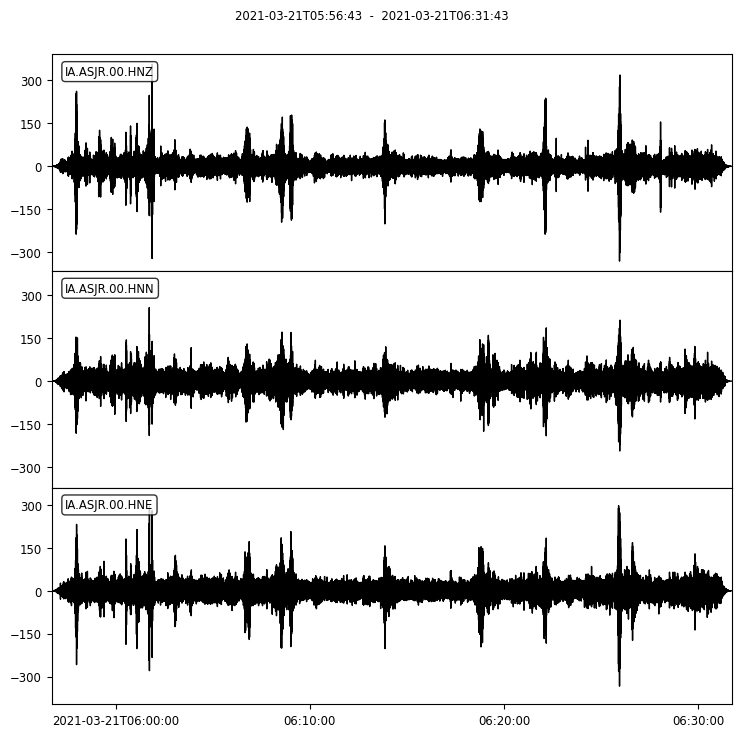

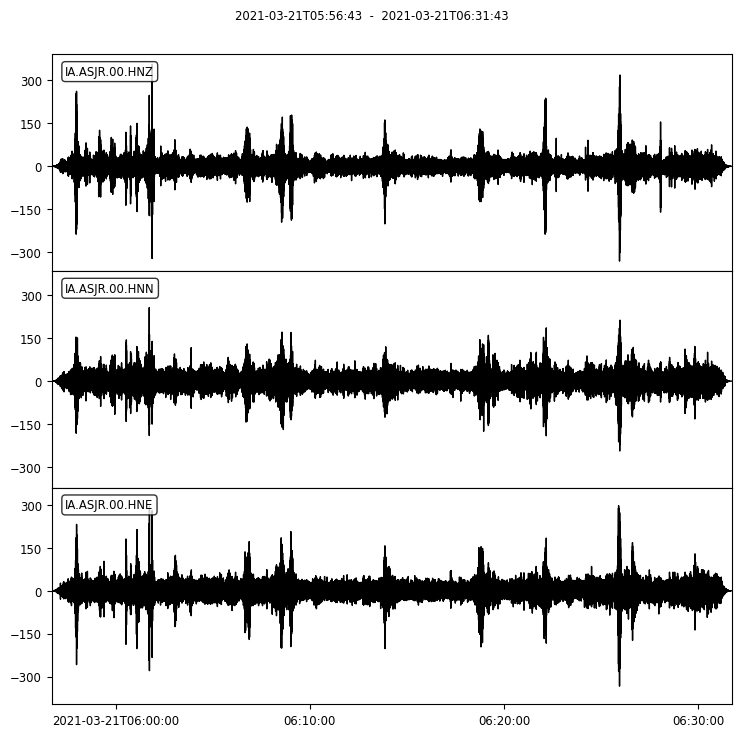

In [ ]:
st_acc_ASJR = st_acc.copy()
st_acc_ASJR.simulate(paz_simulate=respon_stasiun_ASJR_formatted)
st_acc_ASJR.plot()

Kemudian kita bisa bandingkan dengan data asli dalam count (`st`), dalam plot akan digunakan matplotlib:

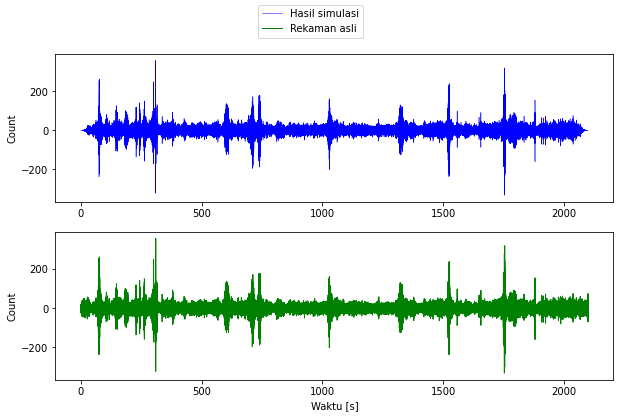

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,1,1)
ax.plot(st_acc_ASJR[0].times(), st_acc_ASJR[0].data, color="blue", alpha=1, linewidth=.5, label="Hasil simulasi")

ax2=fig.add_subplot(2,1,2)
ax2.plot(st[0].times(), st[0].data, color="green", alpha=1, linewidth=1, label="Rekaman asli")

ax.set_ylabel("Count")
ax2.set_ylabel("Count")
ax2.set_xlabel("Waktu [s]")

fig.legend(loc='upper center')


Apabila kita jadikan 1 plot dan *zoom* pada waktu 1020-1040 misalkan:

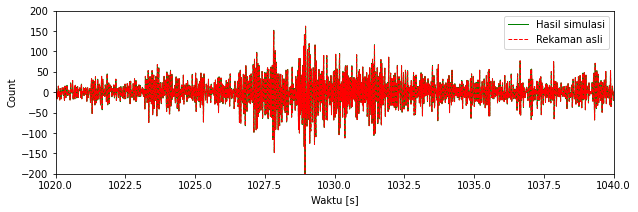

In [ ]:
fig=plt.figure(figsize=(10,3))

ax=fig.add_subplot(1,1,1)
ax.plot(st_acc_ASJR[0].times(), st_acc_ASJR[0].data, color="green", alpha=1, linewidth=1, label="Hasil simulasi")
ax.plot(st[0].times(), st[0].data, color="red", alpha=1, linewidth=1, label="Rekaman asli", linestyle="--")

ax.set_ylabel("Count")
ax.set_xlabel("Waktu [s]")
ax.set_xlim(1020,1040)
ax.set_ylim(-200,200)

ax.legend()

Lebih detail lagi:

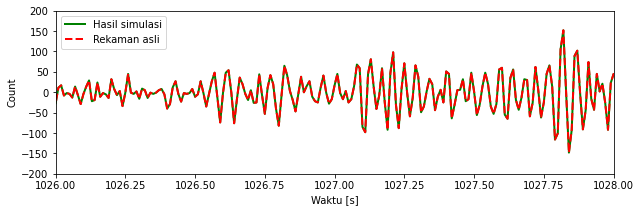

In [ ]:
fig=plt.figure(figsize=(10,3))

ax=fig.add_subplot(1,1,1)
ax.plot(st_acc_ASJR[0].times(), st_acc_ASJR[0].data, color="green", alpha=1, linewidth=2, label="Hasil simulasi")
ax.plot(st[0].times(), st[0].data, color="red", alpha=1, linewidth=2, label="Rekaman asli", linestyle="--")

ax.set_ylabel("Count")
ax.set_xlabel("Waktu [s]")
ax.set_xlim(1026,1028)
ax.set_ylim(-200,200)

ax.legend()

### 4.2 Mengambil respon instrumen dari IRIS Nominal Response Logger melalui `obspy`

Dalam kasus simulasi pada instrumen lain `obspy` memberi jembatan untuk mendapatkan respon instrumen tertentu dari IRIS NRL:

In [ ]:
from obspy.clients.nrl import NRL
nrl = NRL()
nrl

NRL library at http://ds.iris.edu/NRL
  Sensors: 39 manufacturers
    'CEA-DASE', 'CME (now R-Sensors)', 'Chaparral Physics',
    'DTCC (manuafacturers of SmartSolo)', 'EQMet', 'Eentec', 'GEObit'
    'GEOsig', 'GaiaCode', 'Gem', 'Generic', 'Geo Space/OYO',
    'Geodevice', 'Geotech', 'Guralp', 'HGS Products', 'High Tech',
    'Hyperion', 'IESE', 'Johnson Infrasound', 'Kinemetrics', 'LaHusen'
    'Lennartz', 'Lunitek', 'Magseis Fairfield', 'Metrozet',
    'Nanometrics', 'R-Sensors (previously listed as CME', 'REF TEK',
    'Raspberry Shake (formerly OSOP)', 'SARA', 'Seismo Wave',
    'Sercel/Mark Products', 'Silicon Audio', 'SolGeo',
    'Sprengnether (now Eentec)', 'Streckeisen', 'TDG', 'iTem'
  Dataloggers: 29 manufacturers
    'Agecodagis', 'CNSN', 'DAQ Systems (NetDAS)',
    'DTCC (manufacturers of SmartSolo', 'DiGOS/Omnirecs', 'EQMet',
    'Earth Data', 'Eentec', 'GEObit', 'Gem', 'Generic', 'GeoSIG',
    'Geodevice', 'Geotech', 'Guralp', 'Kinemetrics', 'Lunitek',
    'Magseis Fairf

Untuk sensor Guralp:

In [ ]:
nrl.sensors['Guralp']

Select the Guralp sensor model (13 items):
  'CMG-1T', 'CMG-3ESP', 'CMG-3T', 'CMG-3T/5T Hybrid',
  'CMG-3TB (borehole)', 'CMG-3v', 'CMG-40T', 'CMG-5', 'CMG-5TC',
  'CMG-6T', 'CMG-6TF', 'CMG-EDU-T', 'Fortis'

Seri CMG-6T:

In [ ]:
nrl.sensors['Guralp']['CMG-6T']

Select the natural period (or passband) for this sensor (7 items):
  '10s - 100Hz', '1s - 100Hz', '2s - 100Hz', '30s - 100Hz',
  '40s - 100Hz', '5s - 100Hz', '60s - 100Hz'

Misalkan untuk 1s-100 Hz:

In [ ]:
nrl.sensors['Guralp']['CMG-6T']['1s - 100Hz']

Select the sensor sensitivity in V/m/s (4 items):
  '2000', '20000', '2400', '4000'

Sensitivitas 2000 V/m/s:

In [ ]:
response_cmg6t=nrl.sensors['Guralp']['CMG-6T']['1s - 100Hz']['2000']
response_cmg6t

('CMG-6T, 1s-100Hz, 2000 V/m/s',
 'http://ds.iris.edu/NRL/sensors/guralp/RESP.XX.NS070..SHZ.CMG6T.1_100.2000')

Respon untuk datalogger digunakan Guralp DM-24 Mk3 Fixed Gain, gain 1, 1000 sps, tap id 1, (1000 500 250 125 25 and 5 Hz):

In [ ]:
response_guralp=nrl.dataloggers['Guralp']['CMG-DM24']['Mk3']['Fixed']['1-10']['1']['1000']
response_guralp

('DM-24 Mk3 Fixed Gain, gain 1, 1000 sps, tap id 1, (1000 500 250 125 25 and 5 Hz)',
 'http://ds.iris.edu/NRL/dataloggers/guralp/CMG_DM24/mk3/fixed/RESP.XX.G0143..HHZ.CMG_DM24_MK3_FIX.1..1000')

### 4.2 Membuat objek `Response` dari respon instrumen sensor dan datalogger

Setelah kita mendapatkan informasi respon sensor dan datalogger maka kita dapat membuat objek `Response` yang akan digunakan untuk melakukan simulasi, objek ini mirip seperti metadata `Inventory` hanya pada `Response` informasi hanya memuat respon instrumen (`Response` merupakan bagian dari `Inventory`)/

In [ ]:
respon_instrumen = nrl.get_response( 
    sensor_keys=['Guralp','CMG-6T','1s - 100Hz','2000'],
    datalogger_keys=['Guralp','CMG-DM24','Mk3','Fixed','1-10','1','1000'])
respon_instrumen

Channel Response
	From M/S (Velocity in Meters per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 6.24981e+08 defined at 5.000 Hz
	9 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 2000
		Stage 2: ResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to COUNTS, gain: 312500
		Stage 4: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 7: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 8: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 9: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1

No handles with labels found to put in legend.


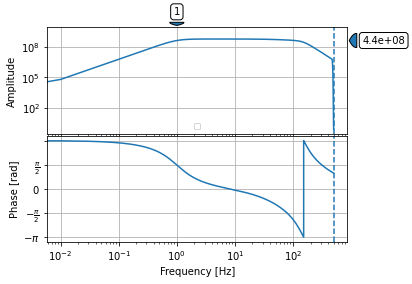

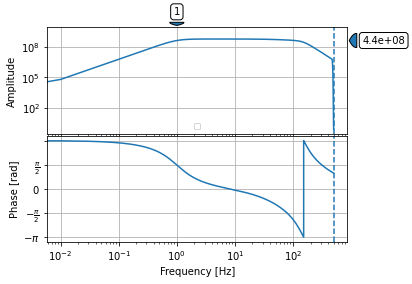

In [ ]:
respon_instrumen.plot(min_freq=0.01)

### 4.3 Melakukan simulasi

Pada `obspy` masih belum ada fungsi untuk konversi `Response` menjadi *dictionary* PAZ yang dibutuhkan pada fungsi `simulate` sehingga kita harus konversi sedikit manual:

In [ ]:
respon_instrumen_paz=respon_instrumen.get_paz().__dict__
respon_instrumen_paz

{'_normalization_frequency': 5.0,
 '_poles': [(-4.4422+4.4422j),
  (-4.4422-4.4422j),
  (-391.96+850.69j),
  (-391.96-850.69j),
  (-471.24+0j),
  (-2199.1+0j)],
 '_pz_transfer_function_type': 'LAPLACE (RADIANS/SECOND)',
 '_zeros': [0j, 0j],
 'decimation_correction': None,
 'decimation_delay': None,
 'decimation_factor': None,
 'decimation_input_sample_rate': None,
 'decimation_offset': None,
 'description': None,
 'input_units': 'M/S',
 'input_units_description': 'Velocity in Meters per Second',
 'name': None,
 'normalization_factor': 911329000000.0,
 'output_units': 'V',
 'output_units_description': 'Volts',
 'resource_id': None,
 'resource_id2': None,
 'stage_gain': 2000.0,
 'stage_gain_frequency': 5.0,
 'stage_sequence_number': 1}

Beberapa `key` perlu kita sesuaikan dengan kebutuhan `simulate`:

In [ ]:
respon_instrumen_paz['poles'] = respon_instrumen_paz['_poles']
respon_instrumen_paz['zeros'] = respon_instrumen_paz['_zeros']
respon_instrumen_paz['gain'] = respon_instrumen_paz['normalization_factor']
respon_instrumen_paz['sensitivity'] = respon_instrumen.instrument_sensitivity.value #overall sensitivity
respon_instrumen_paz

{'_normalization_frequency': 5.0,
 '_poles': [(-4.4422+4.4422j),
  (-4.4422-4.4422j),
  (-391.96+850.69j),
  (-391.96-850.69j),
  (-471.24+0j),
  (-2199.1+0j)],
 '_pz_transfer_function_type': 'LAPLACE (RADIANS/SECOND)',
 '_zeros': [0j, 0j],
 'decimation_correction': None,
 'decimation_delay': None,
 'decimation_factor': None,
 'decimation_input_sample_rate': None,
 'decimation_offset': None,
 'description': None,
 'gain': 911329000000.0,
 'input_units': 'M/S',
 'input_units_description': 'Velocity in Meters per Second',
 'name': None,
 'normalization_factor': 911329000000.0,
 'output_units': 'V',
 'output_units_description': 'Volts',
 'poles': [(-4.4422+4.4422j),
  (-4.4422-4.4422j),
  (-391.96+850.69j),
  (-391.96-850.69j),
  (-471.24+0j),
  (-2199.1+0j)],
 'resource_id': None,
 'resource_id2': None,
 'sensitivity': 624981223.3355017,
 'stage_gain': 2000.0,
 'stage_gain_frequency': 5.0,
 'stage_sequence_number': 1,
 'zeros': [0j, 0j]}

Melakukan simulasi:

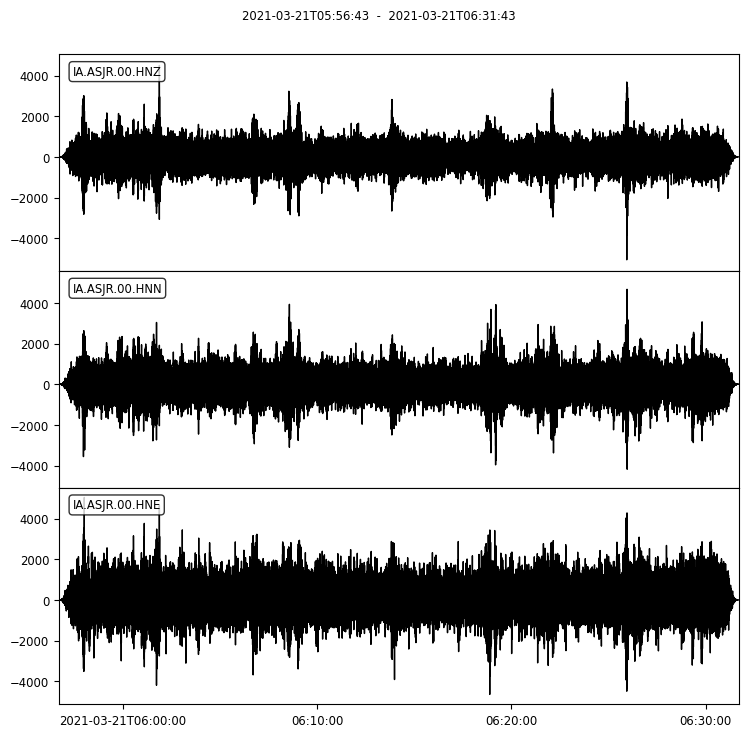

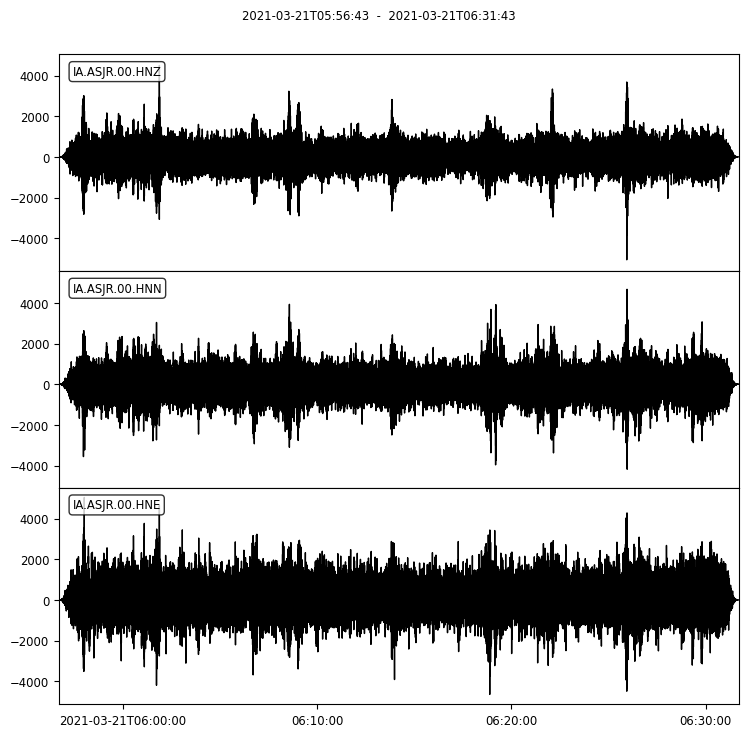

In [ ]:
st_vel_cmg6t = st_vel.copy()
st_vel_cmg6t.simulate(paz_simulate=respon_instrumen_paz)
st_vel_cmg6t.plot()

Plot rekaman getaran tanah sesungguhnya (*velocity*) dari akselerometer ASJR:

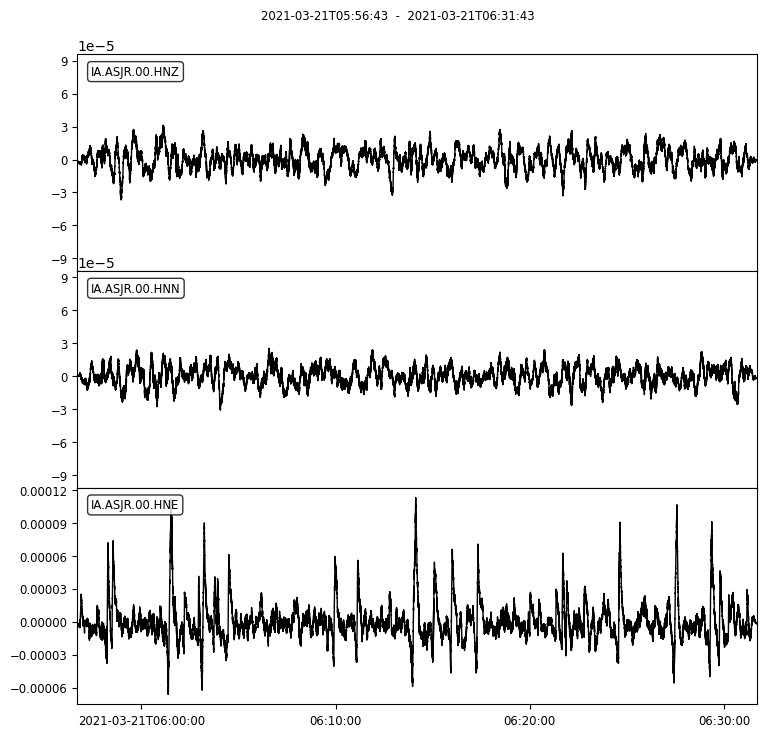

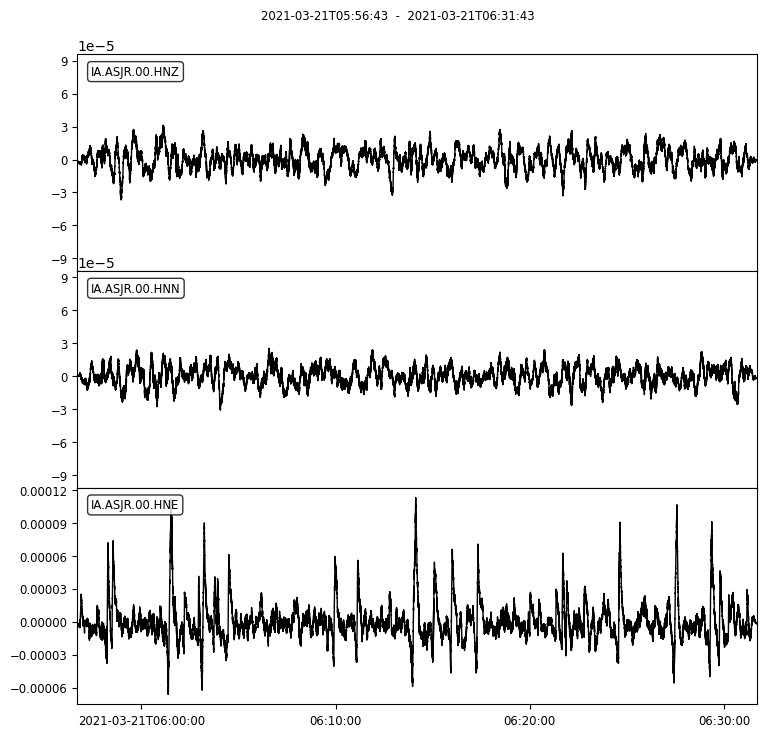

In [ ]:
st_vel.plot()

## 5 Latihan

### 5.1 Membaca data seismik stasiun BLJR

In [ ]:
from obspy import read

st=read('')
st+=read('')
st+=read('')
print(st)

3 Trace(s) in Stream:
IA.BLJR.00.HNZ | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.BLJR.00.HNN | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.BLJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples


### 5.1 Membaca metadata stasiun BLJR

In [ ]:
from obspy import read_inventory
meta = read_inventory("")
print(meta)

Inventory created at 2022-07-15T13:25:33.662082Z
	Sending institution: scxml import (ObsPy Inventory)
	Contains:
		Networks (1):
			IA
		Stations (1):
			IA.BLJR (REIS Bayah)
		Channels (3):
			IA.BLJR.00.HNZ, IA.BLJR.00.HNN, IA.BLJR.00.HNE


### 5.2 Melakukan koreksi instrumen untuk mendapatkan akselerasi

3 Trace(s) in Stream:
IA.BLJR.00.HNZ | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.BLJR.00.HNN | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples
IA.BLJR.00.HNE | 2021-03-21T05:56:43.000000Z - 2021-03-21T06:31:43.000000Z | 100.0 Hz, 210001 samples

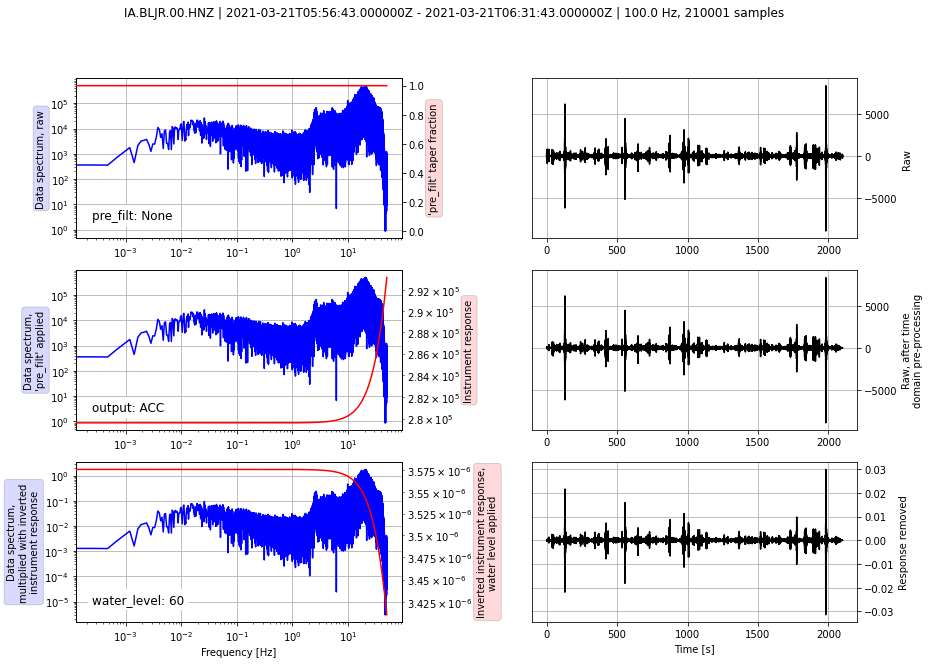

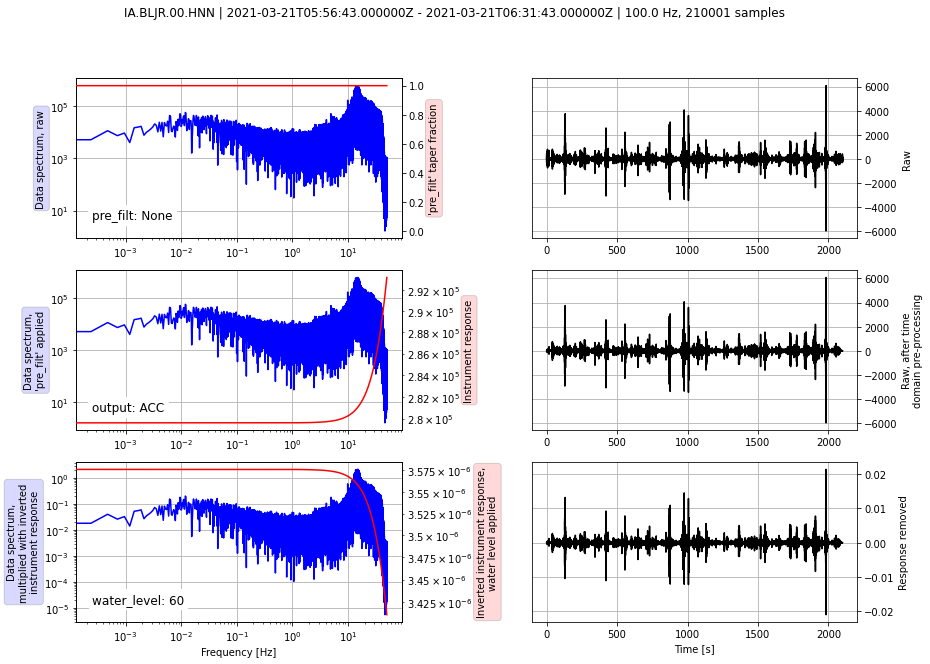

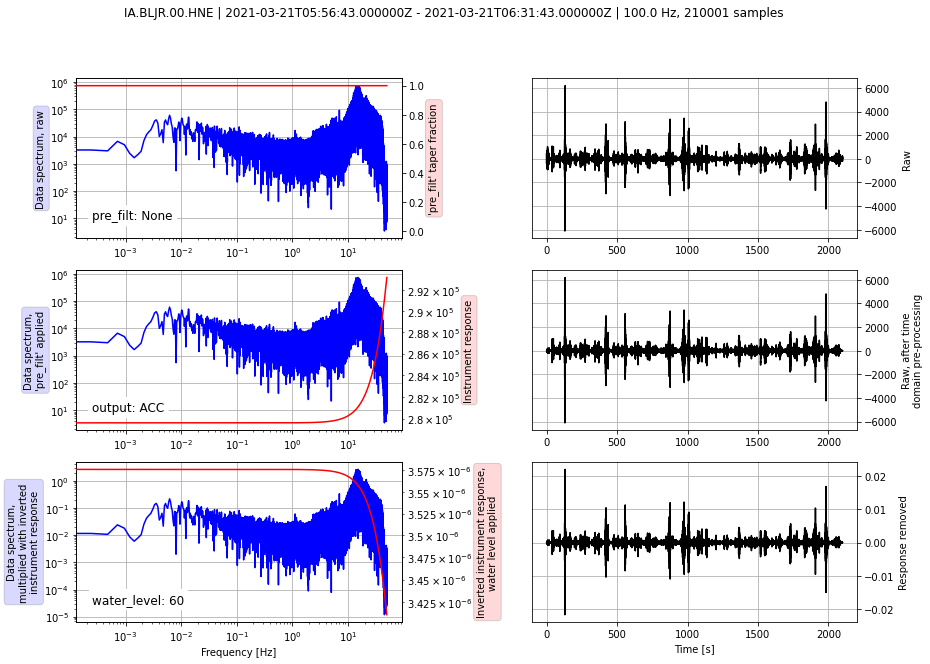

In [ ]:
st_acc = st.copy()
st_acc.remove_response(#isikan disini)